In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns',None)

In [3]:
data=pd.read_csv('/Users/amalajith/Documents/MS DS LJMU/Research References/Datasets/ASD_Toddler_Dataset/Toddler Autism dataset July 2018.csv')
data.head()

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
0,1,0,0,0,0,0,0,1,1,0,1,28,3,f,middle eastern,yes,no,family member,No
1,2,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,yes,no,family member,Yes
2,3,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,yes,no,family member,Yes
3,4,1,1,1,1,1,1,1,1,1,1,24,10,m,Hispanic,no,no,family member,Yes
4,5,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,no,yes,family member,Yes


### Data Description
A1 - A10 are some questions and their answer is given as labels '1' or '0'.

The questions are as follows :

A1 -> Does your child look at you when you call his/her name?

A2 -> How easy is it for you to get eye contact with your child?

A3 -> Does your child point to indicate that s/he wants something? (e.g. a toy that is out of reach)

A4 -> Does your child point to share interest with you? (e.g. pointng at an interes9ng sight)

A5 -> Does your child pretend? (e.g. care for dolls, talk on a toy phone)

A6 -> Does your child follow where you’re looking?

A7 -> If you or someone else in the family is visibly upset, does your child show signs of wan9ng to comfort them? (e.g. stroking hair, hugging them)

A8 -> Would you describe your child’s first words as:

A9 -> Does your child use simple gestures? (e.g. wave goodbye)

A10 -> Does your child stare at nothing with no apparent purpose?

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054 entries, 0 to 1053
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Case_No                 1054 non-null   int64 
 1   A1                      1054 non-null   int64 
 2   A2                      1054 non-null   int64 
 3   A3                      1054 non-null   int64 
 4   A4                      1054 non-null   int64 
 5   A5                      1054 non-null   int64 
 6   A6                      1054 non-null   int64 
 7   A7                      1054 non-null   int64 
 8   A8                      1054 non-null   int64 
 9   A9                      1054 non-null   int64 
 10  A10                     1054 non-null   int64 
 11  Age_Mons                1054 non-null   int64 
 12  Qchat-10-Score          1054 non-null   int64 
 13  Sex                     1054 non-null   object
 14  Ethnicity               1054 non-null   object
 15  Jaun

In [5]:
data.isna().sum()

Case_No                   0
A1                        0
A2                        0
A3                        0
A4                        0
A5                        0
A6                        0
A7                        0
A8                        0
A9                        0
A10                       0
Age_Mons                  0
Qchat-10-Score            0
Sex                       0
Ethnicity                 0
Jaundice                  0
Family_mem_with_ASD       0
Who completed the test    0
Class/ASD Traits          0
dtype: int64

### Data Exploration

In [6]:
data=data.drop(columns=['Case_No'],axis=1)

In [7]:
data.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
0,0,0,0,0,0,0,1,1,0,1,28,3,f,middle eastern,yes,no,family member,No
1,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,yes,no,family member,Yes
2,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,yes,no,family member,Yes
3,1,1,1,1,1,1,1,1,1,1,24,10,m,Hispanic,no,no,family member,Yes
4,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,no,yes,family member,Yes


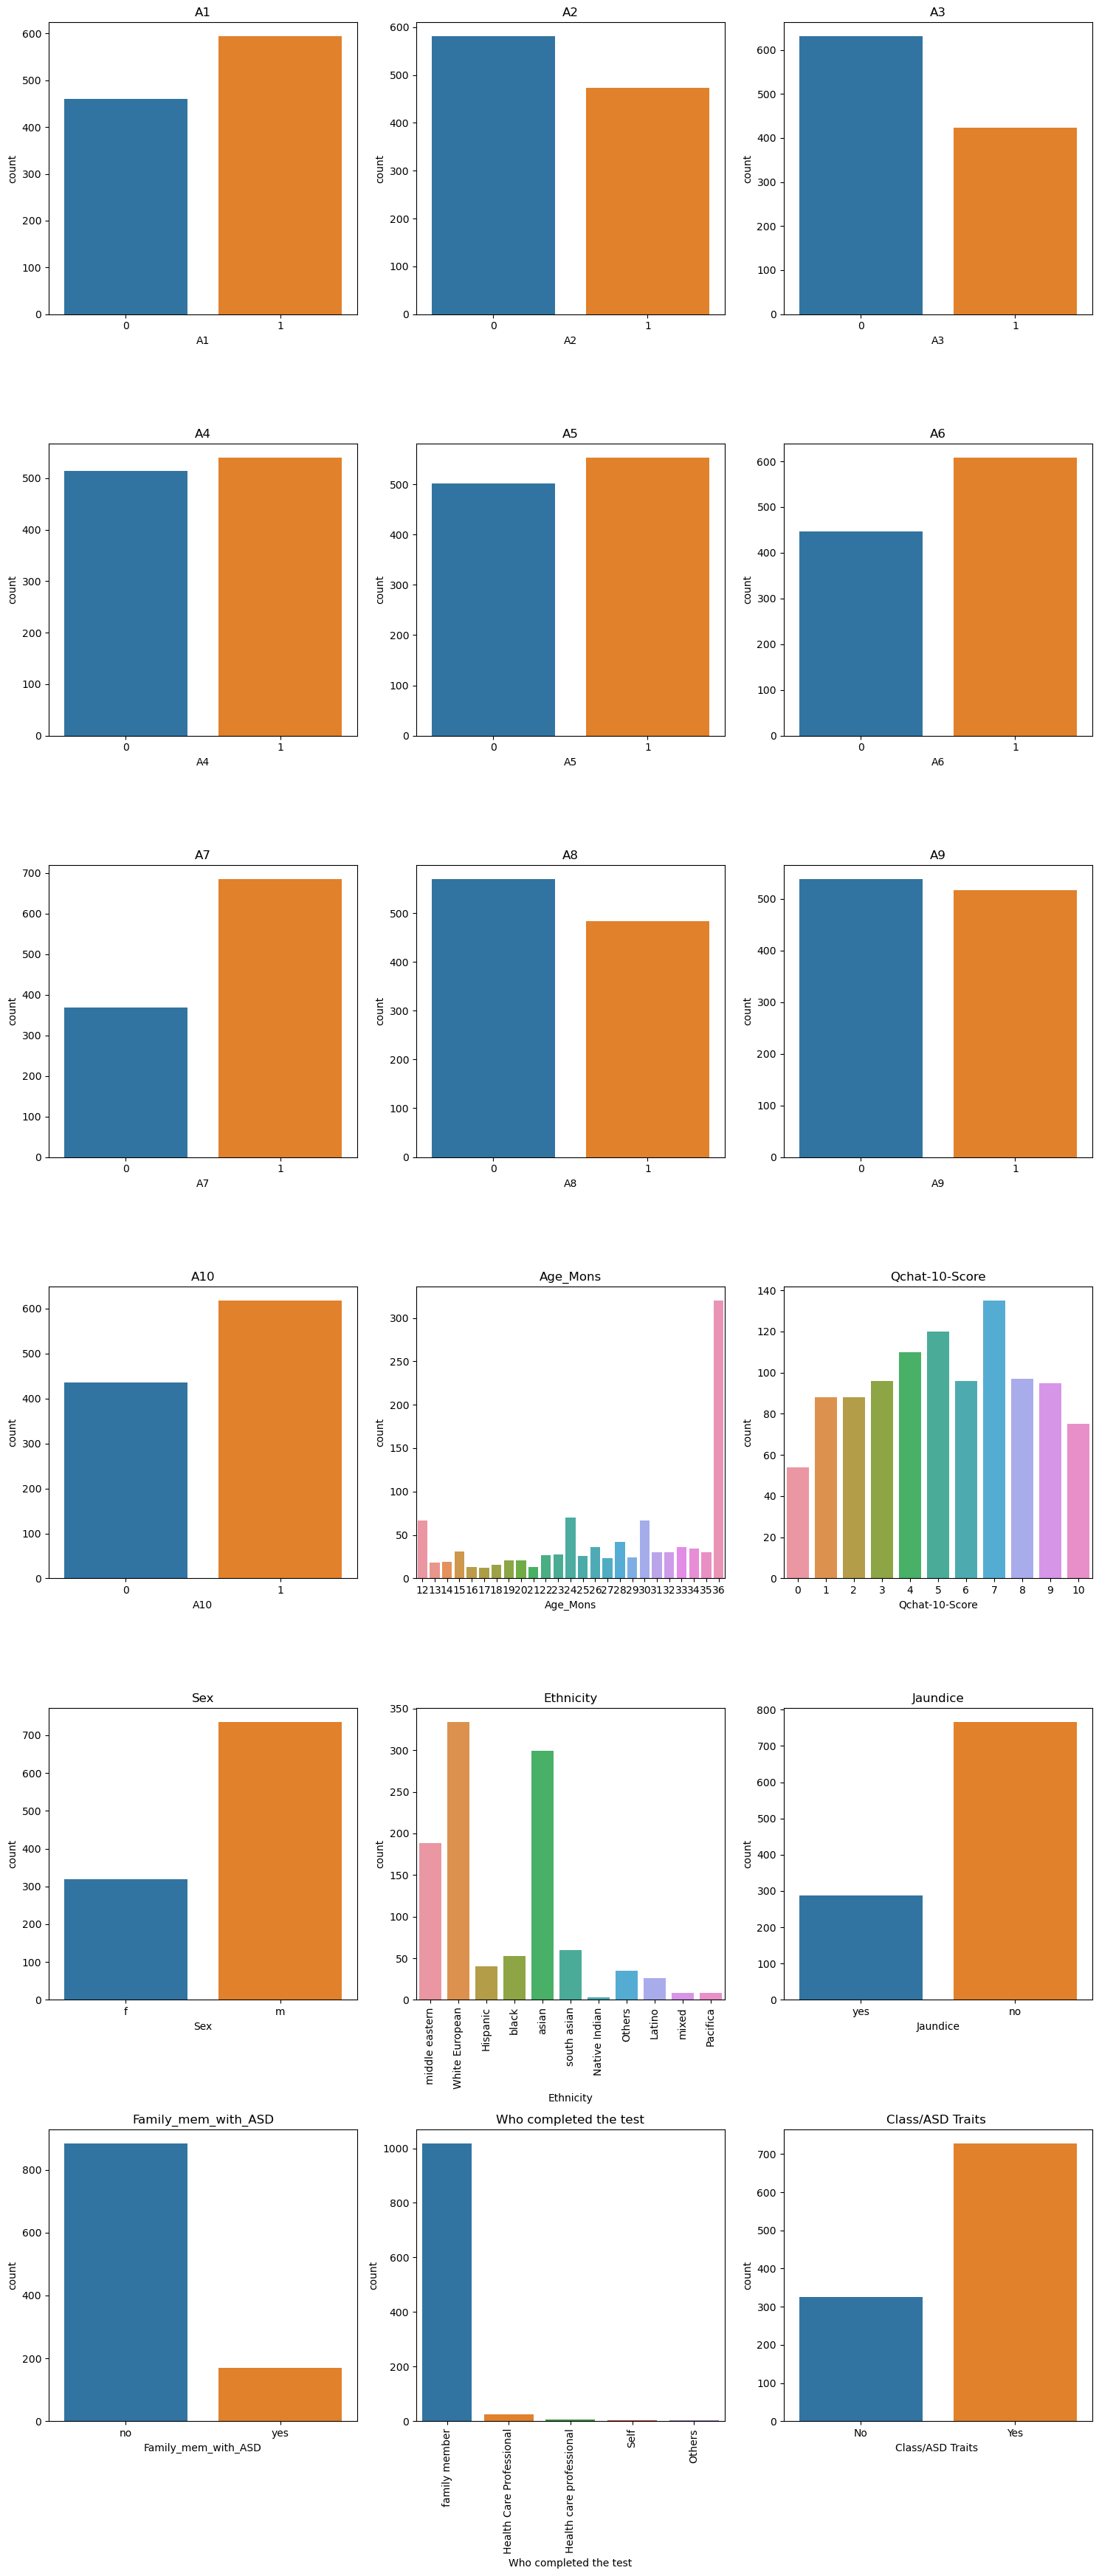

In [8]:
fig,axes=plt.subplots(6,3,figsize=(15,35))
axes=axes.ravel()
for i , col in enumerate(data.iloc[:,:]):
    sns.countplot(x=data[col],ax=axes[i])
    axes[i].set_title(col)
    if col == "Who completed the test" or col == "Ethnicity" or col == "Age Months":
        axes[i].tick_params(axis="x", labelrotation=90)
plt.tight_layout()
plt.show()

In [9]:
data['Class/ASD Traits '].value_counts()

Class/ASD Traits 
Yes    728
No     326
Name: count, dtype: int64

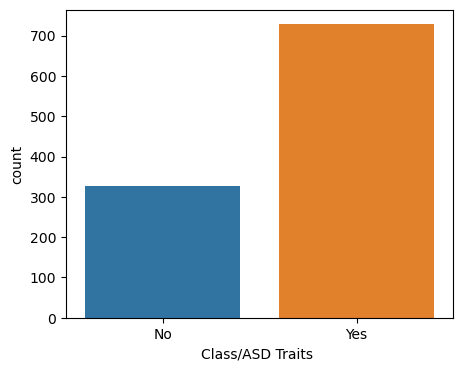

In [10]:
plt.figure(figsize=(5,4))
sns.countplot(x='Class/ASD Traits ',data=data)
plt.show()

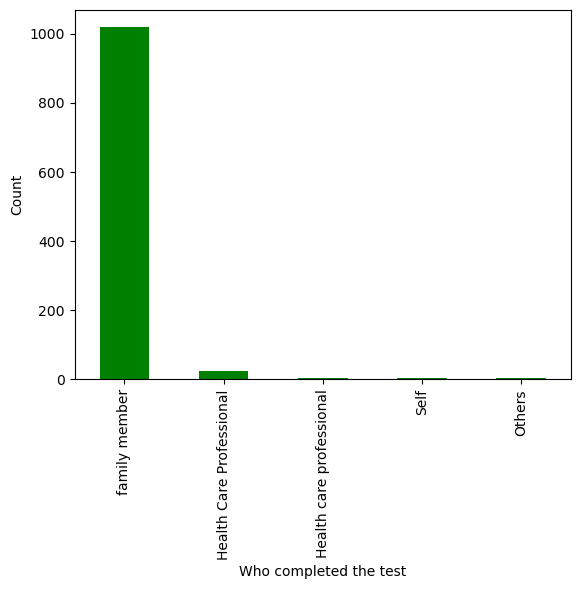

In [11]:
data['Who completed the test'].value_counts().plot.bar(color='green')
plt.xlabel('Who completed the test')
plt.ylabel('Count')
#plt.title('ASD Cases Vs Ethnicity')
plt.show()

In [12]:
data['Family_mem_with_ASD'].value_counts()

Family_mem_with_ASD
no     884
yes    170
Name: count, dtype: int64

In [13]:
data.pivot_table(index='Family_mem_with_ASD',columns='Class/ASD Traits ',aggfunc='size')

Class/ASD Traits,No,Yes
Family_mem_with_ASD,,
no,271,613
yes,55,115


In [14]:
data.Ethnicity.value_counts()

Ethnicity
White European    334
asian             299
middle eastern    188
south asian        60
black              53
Hispanic           40
Others             35
Latino             26
mixed               8
Pacifica            8
Native Indian       3
Name: count, dtype: int64

In [15]:
data.groupby('Class/ASD Traits ')['Family_mem_with_ASD'].value_counts()

Class/ASD Traits   Family_mem_with_ASD
No                 no                     271
                   yes                     55
Yes                no                     613
                   yes                    115
Name: count, dtype: int64

In [16]:
heridata=data.pivot_table(index='Family_mem_with_ASD',columns='Class/ASD Traits ',aggfunc='size')
heridata

Class/ASD Traits,No,Yes
Family_mem_with_ASD,,
no,271,613
yes,55,115


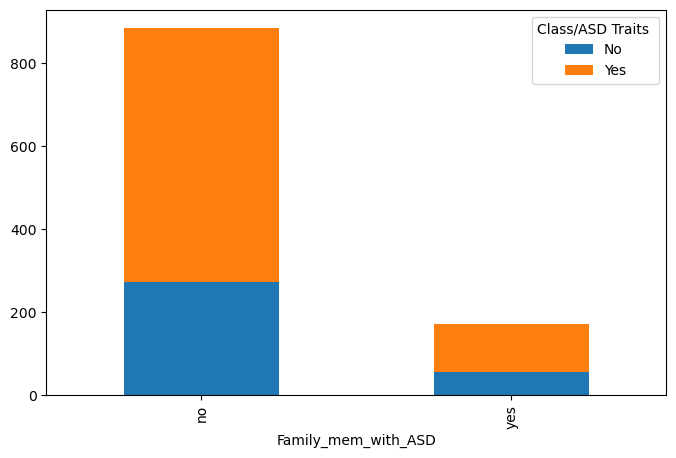

In [17]:
heridata.plot(kind='bar',stacked=True,figsize=(8,5))
plt.show()

In [18]:
data.Ethnicity.value_counts()

Ethnicity
White European    334
asian             299
middle eastern    188
south asian        60
black              53
Hispanic           40
Others             35
Latino             26
mixed               8
Pacifica            8
Native Indian       3
Name: count, dtype: int64

[]

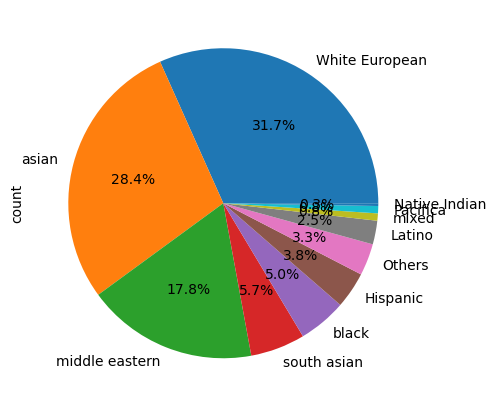

In [19]:
plt.figure(figsize=(5, 45))
data.Ethnicity.value_counts().plot.pie(autopct='%1.1f%%')
plt.plot()

In [20]:
confirmed=data[data['Class/ASD Traits ']=='Yes']

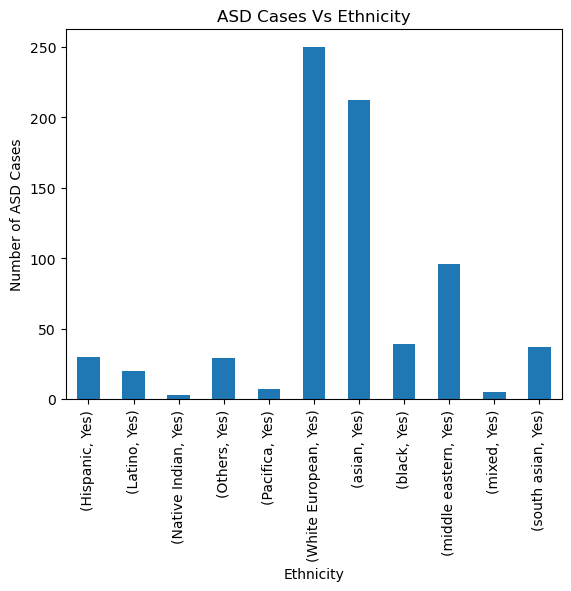

In [21]:
confirmed.groupby('Ethnicity')['Class/ASD Traits '].value_counts().plot.bar()
plt.xlabel('Ethnicity')
plt.ylabel('Number of ASD Cases')
plt.title('ASD Cases Vs Ethnicity')
plt.show()

In [22]:
round(data.groupby('Ethnicity')['Class/ASD Traits '].value_counts(),2)

Ethnicity       Class/ASD Traits 
Hispanic        Yes                   30
                No                    10
Latino          Yes                   20
                No                     6
Native Indian   Yes                    3
Others          Yes                   29
                No                     6
Pacifica        Yes                    7
                No                     1
White European  Yes                  250
                No                    84
asian           Yes                  212
                No                    87
black           Yes                   39
                No                    14
middle eastern  Yes                   96
                No                    92
mixed           Yes                    5
                No                     3
south asian     Yes                   37
                No                    23
Name: count, dtype: int64

In [23]:
data.pivot_table(index='Ethnicity',columns='Class/ASD Traits ',aggfunc='size')

Class/ASD Traits,No,Yes
Ethnicity,,
Hispanic,10.0,30.0
Latino,6.0,20.0
Native Indian,NaN,3.0
Others,6.0,29.0
Pacifica,1.0,7.0
White European,84.0,250.0
asian,87.0,212.0
black,14.0,39.0
middle eastern,92.0,96.0


In [24]:
data.Sex.value_counts()

Sex
m    735
f    319
Name: count, dtype: int64

In [25]:
data['Who completed the test'].value_counts()

Who completed the test
family member               1018
Health Care Professional      24
Health care professional       5
Self                           4
Others                         3
Name: count, dtype: int64

In [26]:
data['Age_Mons'].describe()

count    1054.000000
mean       27.867173
std         7.980354
min        12.000000
25%        23.000000
50%        30.000000
75%        36.000000
max        36.000000
Name: Age_Mons, dtype: float64

In [27]:
asd_counts_jaundice = data[data['Jaundice']=='yes'].groupby('Class/ASD Traits ').size()

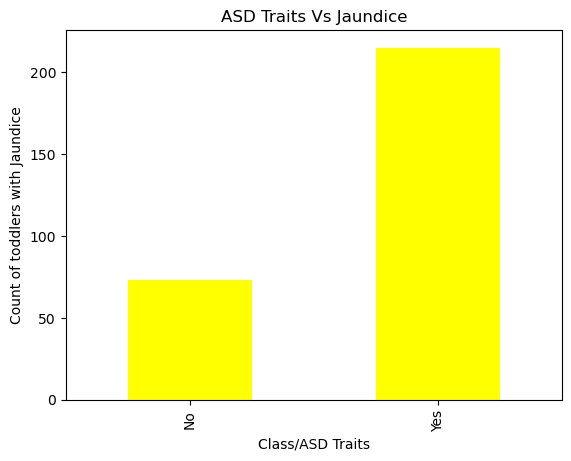

In [83]:
asd_counts_jaundice.plot.bar(color='yellow')
plt.xlabel('Class/ASD Traits')
plt.ylabel('Count of toddlers with Jaundice')
plt.title('ASD Traits Vs Jaundice')
plt.show()

#### Observations
* White Europians and asians are more prone to ASD
* Survey mostly taken by the family members of the toddler
* Babies with parents having ASD are more likely to show ASD traits
* Toddlers already diagnosed with jaundice are more likely to have ASD

### Preprocessing

In [29]:
df1=pd.read_csv('/Users/amalajith/Documents/MS DS LJMU/Research References/Datasets/ASD_Toddler_Dataset/Toddler Autism dataset July 2018.csv')
df1.head()

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
0,1,0,0,0,0,0,0,1,1,0,1,28,3,f,middle eastern,yes,no,family member,No
1,2,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,yes,no,family member,Yes
2,3,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,yes,no,family member,Yes
3,4,1,1,1,1,1,1,1,1,1,1,24,10,m,Hispanic,no,no,family member,Yes
4,5,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,no,yes,family member,Yes


In [30]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054 entries, 0 to 1053
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Case_No                 1054 non-null   int64 
 1   A1                      1054 non-null   int64 
 2   A2                      1054 non-null   int64 
 3   A3                      1054 non-null   int64 
 4   A4                      1054 non-null   int64 
 5   A5                      1054 non-null   int64 
 6   A6                      1054 non-null   int64 
 7   A7                      1054 non-null   int64 
 8   A8                      1054 non-null   int64 
 9   A9                      1054 non-null   int64 
 10  A10                     1054 non-null   int64 
 11  Age_Mons                1054 non-null   int64 
 12  Qchat-10-Score          1054 non-null   int64 
 13  Sex                     1054 non-null   object
 14  Ethnicity               1054 non-null   object
 15  Jaun

In [31]:
df1['Age_Mons']=(df1['Age_Mons']/12).astype(int)

In [32]:
df1.head()

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
0,1,0,0,0,0,0,0,1,1,0,1,2,3,f,middle eastern,yes,no,family member,No
1,2,1,1,0,0,0,1,1,0,0,0,3,4,m,White European,yes,no,family member,Yes
2,3,1,0,0,0,0,0,1,1,0,1,3,4,m,middle eastern,yes,no,family member,Yes
3,4,1,1,1,1,1,1,1,1,1,1,2,10,m,Hispanic,no,no,family member,Yes
4,5,1,1,0,1,1,1,1,1,1,1,1,9,f,White European,no,yes,family member,Yes


In [33]:
df2=pd.read_csv('/Users/amalajith/Documents/MS DS LJMU/Research References/Datasets/ASD_Toddler_Dataset/data_csv.csv')
df2.head()

,CASE_NO_PATIENT'S,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10_Autism_Spectrum_Quotient,Social_Responsiveness_Scale,Age_Years,Qchat_10_Score,Speech Delay/Language Disorder,Learning disorder,Genetic_Disorders,Depression,Global developmental delay/intellectual disability,Social/Behavioural Issues,Childhood Autism Rating Scale,Anxiety_disorder,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who_completed_the_test,ASD_traits
0,1,0,0,0,0,0,0,1,1,0,1,3.0,2,3.0,Yes,Yes,Yes,Yes,Yes,Yes,1,Yes,F,middle eastern,Yes,No,Family Member,No
1,2,1,1,0,0,0,1,1,0,0,0,6.0,3,4.0,Yes,Yes,Yes,Yes,Yes,Yes,2,Yes,M,White European,Yes,No,Family Member,Yes
2,3,1,0,0,0,0,0,1,1,0,1,7.0,3,4.0,Yes,Yes,Yes,Yes,Yes,Yes,4,Yes,M,Middle Eastern,Yes,No,Family Member,Yes
3,4,1,1,1,1,1,1,1,1,1,1,1.0,2,10.0,Yes,Yes,No,Yes,Yes,Yes,2,Yes,M,Hispanic,No,No,Family Member,Yes
4,5,1,1,0,1,1,1,1,1,1,1,3.0,2,9.0,Yes,Yes,No,Yes,Yes,Yes,1,Yes,F,White European,No,No,Family Member,Yes


In [34]:
df2.isna().sum()

CASE_NO_PATIENT'S                                      0
A1                                                     0
A2                                                     0
A3                                                     0
A4                                                     0
A5                                                     0
A6                                                     0
A7                                                     0
A8                                                     0
A9                                                     0
A10_Autism_Spectrum_Quotient                           0
Social_Responsiveness_Scale                            9
Age_Years                                              0
Qchat_10_Score                                        39
Speech Delay/Language Disorder                         0
Learning disorder                                      0
Genetic_Disorders                                      0
Depression                     

In [35]:
df2=df2.dropna()

In [36]:
df3=pd.read_csv('/Users/amalajith/Documents/MS DS LJMU/Research References/Datasets/ASD_Toddler_Dataset/autism_screening.csv')
df3.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,26.0,f,White-European,no,no,United States,no,6.0,18 and more,Self,NO
1,1,1,0,1,0,0,0,1,0,1,24.0,m,Latino,no,yes,Brazil,no,5.0,18 and more,Self,NO
2,1,1,0,1,1,0,1,1,1,1,27.0,m,Latino,yes,yes,Spain,no,8.0,18 and more,Parent,YES
3,1,1,0,1,0,0,1,1,0,1,35.0,f,White-European,no,yes,United States,no,6.0,18 and more,Self,NO
4,1,0,0,0,0,0,0,1,0,0,40.0,f,?,no,no,Egypt,no,2.0,18 and more,?,NO


In [37]:
df3.isna().sum()

A1_Score           0
A2_Score           0
A3_Score           0
A4_Score           0
A5_Score           0
A6_Score           0
A7_Score           0
A8_Score           0
A9_Score           0
A10_Score          0
age                2
gender             0
ethnicity          0
jundice            0
austim             0
contry_of_res      0
used_app_before    0
result             0
age_desc           0
relation           0
Class/ASD          0
dtype: int64

In [38]:
df3=df3.dropna()

In [39]:
df3["age"]=(df3['age']/12).astype(int)
df3.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,2,f,White-European,no,no,United States,no,6.0,18 and more,Self,NO
1,1,1,0,1,0,0,0,1,0,1,2,m,Latino,no,yes,Brazil,no,5.0,18 and more,Self,NO
2,1,1,0,1,1,0,1,1,1,1,2,m,Latino,yes,yes,Spain,no,8.0,18 and more,Parent,YES
3,1,1,0,1,0,0,1,1,0,1,2,f,White-European,no,yes,United States,no,6.0,18 and more,Self,NO
4,1,0,0,0,0,0,0,1,0,0,3,f,?,no,no,Egypt,no,2.0,18 and more,?,NO


In [40]:
df3.age.value_counts()

age
2     285
1     253
3     122
4      37
5       4
31      1
Name: count, dtype: int64

In [41]:
print(df1.columns)

Index(['Case_No', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10',
       'Age_Mons', 'Qchat-10-Score', 'Sex', 'Ethnicity', 'Jaundice',
       'Family_mem_with_ASD', 'Who completed the test', 'Class/ASD Traits '],
      dtype='object')


In [42]:
print(df2.columns)

Index(['CASE_NO_PATIENT'S', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8',
       'A9', 'A10_Autism_Spectrum_Quotient', 'Social_Responsiveness_Scale',
       'Age_Years', 'Qchat_10_Score', 'Speech Delay/Language Disorder',
       'Learning disorder', 'Genetic_Disorders', 'Depression',
       'Global developmental delay/intellectual disability',
       'Social/Behavioural Issues', 'Childhood Autism Rating Scale',
       'Anxiety_disorder', 'Sex', 'Ethnicity', 'Jaundice',
       'Family_mem_with_ASD', 'Who_completed_the_test', 'ASD_traits'],
      dtype='object')


In [43]:
print(df3.columns)

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'age_desc', 'relation', 'Class/ASD'],
      dtype='object')


In [44]:
df1=df1.iloc[:,1:]
df1.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
0,0,0,0,0,0,0,1,1,0,1,2,3,f,middle eastern,yes,no,family member,No
1,1,1,0,0,0,1,1,0,0,0,3,4,m,White European,yes,no,family member,Yes
2,1,0,0,0,0,0,1,1,0,1,3,4,m,middle eastern,yes,no,family member,Yes
3,1,1,1,1,1,1,1,1,1,1,2,10,m,Hispanic,no,no,family member,Yes
4,1,1,0,1,1,1,1,1,1,1,1,9,f,White European,no,yes,family member,Yes


In [45]:
df2=pd.concat([df2.iloc[:,1:11],df2.iloc[:,[12,13,22,23,24,25,26,27]]],axis=1)
df2.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10_Autism_Spectrum_Quotient,Age_Years,Qchat_10_Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who_completed_the_test,ASD_traits
0,0,0,0,0,0,0,1,1,0,1,2,3.0,F,middle eastern,Yes,No,Family Member,No
1,1,1,0,0,0,1,1,0,0,0,3,4.0,M,White European,Yes,No,Family Member,Yes
2,1,0,0,0,0,0,1,1,0,1,3,4.0,M,Middle Eastern,Yes,No,Family Member,Yes
3,1,1,1,1,1,1,1,1,1,1,2,10.0,M,Hispanic,No,No,Family Member,Yes
4,1,1,0,1,1,1,1,1,1,1,2,9.0,F,White European,No,No,Family Member,Yes


In [46]:
df2.rename(columns={'A10_Autism_Spectrum_Quotient':'A10','ASD_traits':'ASD_Traits'},inplace=True)

In [47]:
df3=pd.concat([df3.iloc[:,0:11],df3.iloc[:,[17,11,12,13,14,19,20]]],axis=1)
df3.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result,gender,ethnicity,jundice,austim,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,2,6.0,f,White-European,no,no,Self,NO
1,1,1,0,1,0,0,0,1,0,1,2,5.0,m,Latino,no,yes,Self,NO
2,1,1,0,1,1,0,1,1,1,1,2,8.0,m,Latino,yes,yes,Parent,YES
3,1,1,0,1,0,0,1,1,0,1,2,6.0,f,White-European,no,yes,Self,NO
4,1,0,0,0,0,0,0,1,0,0,3,2.0,f,?,no,no,?,NO


In [48]:
df1.columns = df2.columns
df3.columns = df2.columns

In [49]:
def uniqueDfVals(df):
    for i in df.columns:
        print()
        print(i, f" : {df[i].unique()}\n")

In [50]:
uniqueDfVals(df1)


A1  : [0 1]


A2  : [0 1]


A3  : [0 1]


A4  : [0 1]


A5  : [0 1]


A6  : [0 1]


A7  : [1 0]


A8  : [1 0]


A9  : [0 1]


A10  : [1 0]


Age_Years  : [2 3 1]


Qchat_10_Score  : [ 3  4 10  9  8  5  6  2  0  7  1]


Sex  : ['f' 'm']


Ethnicity  : ['middle eastern' 'White European' 'Hispanic' 'black' 'asian'
 'south asian' 'Native Indian' 'Others' 'Latino' 'mixed' 'Pacifica']


Jaundice  : ['yes' 'no']


Family_mem_with_ASD  : ['no' 'yes']


Who_completed_the_test  : ['family member' 'Health Care Professional' 'Health care professional'
 'Self' 'Others']


ASD_Traits  : ['No' 'Yes']



In [51]:
uniqueDfVals(df2)


A1  : [0 1]


A2  : [0 1]


A3  : [0 1]


A4  : [0 1]


A5  : [0 1]


A6  : [0 1]


A7  : [1 0]


A8  : [1 0]


A9  : [0 1]


A10  : [1 0]


Age_Years  : [ 2  3  1 15 18 12  4  5  9  6  8  7 17 16 14 11 13 10]


Qchat_10_Score  : [ 3.  4. 10.  9.  8.  5.  6.  2.  7.  0.  1.]


Sex  : ['F' 'M']


Ethnicity  : ['middle eastern' 'White European' 'Middle Eastern' 'Hispanic' 'Black'
 'Asian' 'South Asian' 'Native Indian' 'Others' 'black' 'asian' 'Latino'
 'Mixed' 'south asian' 'mixed' 'PaciFica']


Jaundice  : ['Yes' 'No']


Family_mem_with_ASD  : ['No' 'Yes']


Who_completed_the_test  : ['Family Member' 'Health Care Professional' 'Self' 'Family member'
 'Others' 'School and NGO']


ASD_Traits  : ['No' 'Yes']



In [52]:
uniqueDfVals(df3)


A1  : [1 0]


A2  : [1 0]


A3  : [1 0]


A4  : [1 0]


A5  : [0 1]


A6  : [0 1]


A7  : [1 0]


A8  : [1 0]


A9  : [0 1]


A10  : [0 1]


Age_Years  : [ 2  3  1  5  4 31]


Qchat_10_Score  : [ 6.  5.  8.  2.  9. 10.  4.  3.  0.  1.  7.]


Sex  : ['f' 'm']


Ethnicity  : ['White-European' 'Latino' '?' 'Others' 'Black' 'Asian' 'Middle Eastern '
 'Pasifika' 'South Asian' 'Hispanic' 'Turkish' 'others']


Jaundice  : ['no' 'yes']


Family_mem_with_ASD  : ['no' 'yes']


Who_completed_the_test  : ['Self' 'Parent' '?' 'Health care professional' 'Relative' 'Others']


ASD_Traits  : ['NO' 'YES']



In [53]:
data=pd.concat([df1,df2,df3])
data.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Years,Qchat_10_Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who_completed_the_test,ASD_Traits
0,0,0,0,0,0,0,1,1,0,1,2,3.0,f,middle eastern,yes,no,family member,No
1,1,1,0,0,0,1,1,0,0,0,3,4.0,m,White European,yes,no,family member,Yes
2,1,0,0,0,0,0,1,1,0,1,3,4.0,m,middle eastern,yes,no,family member,Yes
3,1,1,1,1,1,1,1,1,1,1,2,10.0,m,Hispanic,no,no,family member,Yes
4,1,1,0,1,1,1,1,1,1,1,1,9.0,f,White European,no,yes,family member,Yes


In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3679 entries, 0 to 703
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   A1                      3679 non-null   int64  
 1   A2                      3679 non-null   int64  
 2   A3                      3679 non-null   int64  
 3   A4                      3679 non-null   int64  
 4   A5                      3679 non-null   int64  
 5   A6                      3679 non-null   int64  
 6   A7                      3679 non-null   int64  
 7   A8                      3679 non-null   int64  
 8   A9                      3679 non-null   int64  
 9   A10                     3679 non-null   int64  
 10  Age_Years               3679 non-null   int64  
 11  Qchat_10_Score          3679 non-null   float64
 12  Sex                     3679 non-null   object 
 13  Ethnicity               3679 non-null   object 
 14  Jaundice                3679 non-null   object

In [55]:
#Standardising values for each categorical attributes
fmreplacements = {
    'f': 'F',
    'm': 'M',
}
data['Sex']=data['Sex'].replace(fmreplacements)

In [56]:
ynreplacements={
    'yes':'Yes',
    'no':'No',
    'YES':'Yes',
    'NO':'No'
}
data['Jaundice']=data['Jaundice'].replace(ynreplacements)
data['Family_mem_with_ASD']=data['Family_mem_with_ASD'].replace(ynreplacements)
data['ASD_Traits']=data['ASD_Traits'].replace(ynreplacements)

In [57]:
unknownreplace={'?':'Unknown','Family member':'Family Member'}
data['Who_completed_the_test']=data['Who_completed_the_test'].replace(unknownreplace)
data['Ethnicity']=data['Ethnicity'].replace(unknownreplace)

In [58]:
round(data['Who_completed_the_test'].value_counts()/(len(data))*100,2)

Who_completed_the_test
Health Care Professional    33.19
family member               27.67
Family Member               19.05
Self                        14.41
Unknown                      2.53
Parent                       1.36
Relative                     0.76
School and NGO               0.49
Others                       0.30
Health care professional     0.24
Name: count, dtype: float64

In [59]:
uniqueDfVals(data)


A1  : [0 1]


A2  : [0 1]


A3  : [0 1]


A4  : [0 1]


A5  : [0 1]


A6  : [0 1]


A7  : [1 0]


A8  : [1 0]


A9  : [0 1]


A10  : [1 0]


Age_Years  : [ 2  3  1 15 18 12  4  5  9  6  8  7 17 16 14 11 13 10 31]


Qchat_10_Score  : [ 3.  4. 10.  9.  8.  5.  6.  2.  0.  7.  1.]


Sex  : ['F' 'M']


Ethnicity  : ['middle eastern' 'White European' 'Hispanic' 'black' 'asian'
 'south asian' 'Native Indian' 'Others' 'Latino' 'mixed' 'Pacifica'
 'Middle Eastern' 'Black' 'Asian' 'South Asian' 'Mixed' 'PaciFica'
 'White-European' 'Unknown' 'Middle Eastern ' 'Pasifika' 'Turkish'
 'others']


Jaundice  : ['Yes' 'No']


Family_mem_with_ASD  : ['No' 'Yes']


Who_completed_the_test  : ['family member' 'Health Care Professional' 'Health care professional'
 'Self' 'Others' 'Family Member' 'School and NGO' 'Parent' 'Unknown'
 'Relative']


ASD_Traits  : ['No' 'Yes']



In [60]:
round(data.Who_completed_the_test.value_counts()*100/len(data),2)

Who_completed_the_test
Health Care Professional    33.19
family member               27.67
Family Member               19.05
Self                        14.41
Unknown                      2.53
Parent                       1.36
Relative                     0.76
School and NGO               0.49
Others                       0.30
Health care professional     0.24
Name: count, dtype: float64

In [61]:
#As toddlers cannot enter their data by their own lets drop all those records
data=data[~(data['Who_completed_the_test']=='Self')]

In [62]:
data['Who_completed_the_test'].value_counts()

Who_completed_the_test
Health Care Professional    1221
family member               1018
Family Member                701
Unknown                       93
Parent                        50
Relative                      28
School and NGO                18
Others                        11
Health care professional       9
Name: count, dtype: int64

In [63]:
#Splitting dependent and independent variables
X=data.drop('ASD_Traits',axis=1)
y=data['ASD_Traits']

### Encoding

In [64]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [65]:
#Label encoding
lb=LabelEncoder()
X['Sex']=lb.fit_transform(X['Sex'])
X['Jaundice']=lb.fit_transform(X['Jaundice'])
X['Family_mem_with_ASD']=lb.fit_transform(X['Family_mem_with_ASD'])
y=lb.fit_transform(y)

In [66]:
#One hot encoding
X=pd.get_dummies(X,columns=['Ethnicity','Who_completed_the_test'])

In [67]:
X.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Years,Qchat_10_Score,Sex,Jaundice,Family_mem_with_ASD,Ethnicity_Asian,Ethnicity_Black,Ethnicity_Hispanic,Ethnicity_Latino,Ethnicity_Middle Eastern,Ethnicity_Middle Eastern,Ethnicity_Mixed,Ethnicity_Native Indian,Ethnicity_Others,Ethnicity_PaciFica,Ethnicity_Pacifica,Ethnicity_Pasifika,Ethnicity_South Asian,Ethnicity_Turkish,Ethnicity_Unknown,Ethnicity_White European,Ethnicity_White-European,Ethnicity_asian,Ethnicity_black,Ethnicity_middle eastern,Ethnicity_mixed,Ethnicity_south asian,Who_completed_the_test_Family Member,Who_completed_the_test_Health Care Professional,Who_completed_the_test_Health care professional,Who_completed_the_test_Others,Who_completed_the_test_Parent,Who_completed_the_test_Relative,Who_completed_the_test_School and NGO,Who_completed_the_test_Unknown,Who_completed_the_test_family member
0,0,0,0,0,0,0,1,1,0,1,2,3.0,0,1,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True
1,1,1,0,0,0,1,1,0,0,0,3,4.0,1,1,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
2,1,0,0,0,0,0,1,1,0,1,3,4.0,1,1,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True
3,1,1,1,1,1,1,1,1,1,1,2,10.0,1,0,0,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
4,1,1,0,1,1,1,1,1,1,1,1,9.0,0,0,1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


### Train Test Data Splitting

In [68]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=72)

### Feature Scaling

In [69]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

### Model Implementation

In [70]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,confusion_matrix

In [71]:
def train_model(model, X_train, y_train, X_test, y_test):
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    matrix=confusion_matrix(y_test,y_pred)
    print("Confusion Matrix: ")
    print(matrix)
    print("\n\nScore Table: ")
    score_df = pd.DataFrame([[accuracy, precision, recall, f1]], 
                            columns=["accuracy", "precision", "recall", "f1"])
    
    return score_df

#### Logistic Regression

In [72]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
result=train_model(model,X_train, y_train, X_test, y_test)
result.index=["Logistic Regression"]
result

Confusion Matrix: 
[[240  41]
 [ 30 319]]


Score Table: 


,accuracy,precision,recall,f1
Logistic Regression,0.887302,0.886111,0.91404,0.899859


#### Decision Tree Classifier

In [73]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
dt = train_model(model, X_train, y_train, X_test, y_test)
dt.index = ["Decision Tree Classifier"]
result=pd.concat([result,dt])
result

Confusion Matrix: 
[[269  12]
 [  6 343]]


Score Table: 


,accuracy,precision,recall,f1
Logistic Regression,0.887302,0.886111,0.914040,0.899859
Decision Tree Classifier,0.971429,0.966197,0.982808,0.974432


#### Random Forest Classifier

In [74]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
rfc = train_model(model, X_train, y_train, X_test, y_test)
rfc.index = ["Random Forest Classifier"]
result = pd.concat([result,rfc])
result

Confusion Matrix: 
[[273   8]
 [  1 348]]


Score Table: 


,accuracy,precision,recall,f1
Logistic Regression,0.887302,0.886111,0.914040,0.899859
Decision Tree Classifier,0.971429,0.966197,0.982808,0.974432
Random Forest Classifier,0.985714,0.977528,0.997135,0.987234


In [75]:
# XGBoost Classifier
from xgboost import XGBClassifier
model = XGBClassifier()
xg = train_model(model, X_train, y_train, X_test, y_test)
xg.index = ["XGBoost Classifier"]
result=pd.concat([result,xg])
result

Confusion Matrix: 
[[277   4]
 [  3 346]]


Score Table: 


,accuracy,precision,recall,f1
Logistic Regression,0.887302,0.886111,0.914040,0.899859
Decision Tree Classifier,0.971429,0.966197,0.982808,0.974432
Random Forest Classifier,0.985714,0.977528,0.997135,0.987234
XGBoost Classifier,0.988889,0.988571,0.991404,0.989986


In [76]:
# GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()
gb = train_model(model, X_train, y_train, X_test, y_test)
gb.index = ["Gradient Boosting Classifier"]
result = pd.concat([result,gb])
result

Confusion Matrix: 
[[271  10]
 [  1 348]]


Score Table: 


,accuracy,precision,recall,f1
Logistic Regression,0.887302,0.886111,0.914040,0.899859
Decision Tree Classifier,0.971429,0.966197,0.982808,0.974432
Random Forest Classifier,0.985714,0.977528,0.997135,0.987234
XGBoost Classifier,0.988889,0.988571,0.991404,0.989986
Gradient Boosting Classifier,0.982540,0.972067,0.997135,0.984441


#### KNN

In [77]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier()
knc=train_model(model,X_train,y_train,X_test,y_test)
knc.index=['K-Neighbors Classifier']
result=pd.concat([result,knc])
result

Confusion Matrix: 
[[254  27]
 [ 17 332]]


Score Table: 


,accuracy,precision,recall,f1
Logistic Regression,0.887302,0.886111,0.914040,0.899859
Decision Tree Classifier,0.971429,0.966197,0.982808,0.974432
Random Forest Classifier,0.985714,0.977528,0.997135,0.987234
XGBoost Classifier,0.988889,0.988571,0.991404,0.989986
Gradient Boosting Classifier,0.982540,0.972067,0.997135,0.984441
K-Neighbors Classifier,0.930159,0.924791,0.951289,0.937853


#### Support Vector Machine

In [78]:
from sklearn.svm import SVC
model = SVC()
svm = train_model(model, X_train, y_train, X_test, y_test)
svm.index = ["SVM Classifier"]
result = pd.concat([result,svm])
result

Confusion Matrix: 
[[254  27]
 [ 13 336]]


Score Table: 


,accuracy,precision,recall,f1
Logistic Regression,0.887302,0.886111,0.914040,0.899859
Decision Tree Classifier,0.971429,0.966197,0.982808,0.974432
Random Forest Classifier,0.985714,0.977528,0.997135,0.987234
XGBoost Classifier,0.988889,0.988571,0.991404,0.989986
Gradient Boosting Classifier,0.982540,0.972067,0.997135,0.984441
K-Neighbors Classifier,0.930159,0.924791,0.951289,0.937853
SVM Classifier,0.936508,0.925620,0.962751,0.943820


#### AdaBoostClassifier

In [79]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()
adb = train_model(model, X_train, y_train, X_test, y_test)
adb.index = ["Ada Boost Classifier"]
result = pd.concat([result,adb])
#result.append(adb)
result

Confusion Matrix: 
[[266  15]
 [ 14 335]]


Score Table: 


,accuracy,precision,recall,f1
Logistic Regression,0.887302,0.886111,0.914040,0.899859
Decision Tree Classifier,0.971429,0.966197,0.982808,0.974432
Random Forest Classifier,0.985714,0.977528,0.997135,0.987234
XGBoost Classifier,0.988889,0.988571,0.991404,0.989986
Gradient Boosting Classifier,0.982540,0.972067,0.997135,0.984441
K-Neighbors Classifier,0.930159,0.924791,0.951289,0.937853
SVM Classifier,0.936508,0.925620,0.962751,0.943820
Ada Boost Classifier,0.953968,0.957143,0.959885,0.958512


#### Naive Bayes

In [80]:
from sklearn.naive_bayes import BernoulliNB
model=BernoulliNB()
bnb=train_model(model, X_train, y_train, X_test, y_test)
bnb.index = ["Naives Bayes Classifier"]
result = pd.concat([result,bnb])
result

Confusion Matrix: 
[[259  22]
 [ 74 275]]


Score Table: 


,accuracy,precision,recall,f1
Logistic Regression,0.887302,0.886111,0.914040,0.899859
Decision Tree Classifier,0.971429,0.966197,0.982808,0.974432
Random Forest Classifier,0.985714,0.977528,0.997135,0.987234
XGBoost Classifier,0.988889,0.988571,0.991404,0.989986
Gradient Boosting Classifier,0.982540,0.972067,0.997135,0.984441
K-Neighbors Classifier,0.930159,0.924791,0.951289,0.937853
SVM Classifier,0.936508,0.925620,0.962751,0.943820
Ada Boost Classifier,0.953968,0.957143,0.959885,0.958512
Naives Bayes Classifier,0.847619,0.925926,0.787966,0.851393


### Conclusion
XGBoost algorithm outperforms everyother algorithms for ASD classification in toddlers dataset.